# Railspace Text + Patch Data Exploration

This notebook provides some examples of how to load and visualise the text outputs of MapReader. 

We focus on the geography of railspace and labels describing railspace on maps.

----

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from collections import Counter
from tqdm import tqdm
from shapely import from_wkt, to_wkt

# 1. Load data

In [2]:
# 1.1 Load the patch labels (i.e. railspace/no) for railspace model

patch_labels = pd.read_csv("../post_processed_railspace_predictions_patch_df.csv", index_col=0)
patch_labels["geometry"] = patch_labels["geometry"].apply(from_wkt) # convert the geometry column to shapely objects
patch_labels = gpd.GeoDataFrame(patch_labels, geometry="geometry", crs="EPSG:4326")

patch_labels.head(3)

,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,predicted_label,pred,conf,min_x,min_y,max_x,max_y,new_predicted_label,new_pred
image_id,,,,,,,,,,,,,,,,
patch-0-0-134-134-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 0, 134, 134)","(-0.230712890625, 51.49416936411413, -0.229275...",EPSG:4326,"POLYGON ((-0.22928 51.49417, -0.22928 51.49506...",no,0,0.962000,0,0,134,134,no,0.0
patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,"POLYGON ((-0.22928 51.49327, -0.22928 51.49417...",railspace,1,0.999944,0,134,134,268,railspace,1.0
patch-0-268-134-402-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 268, 134, 402)","(-0.230712890625, 51.492378632055, -0.22927522...",EPSG:4326,"POLYGON ((-0.22928 51.49238, -0.22928 51.49327...",no,0,0.999654,0,268,134,402,no,0.0


In [4]:
## Load the patch stats for the 100m patches
patch_df = pd.read_csv("./100meter_patch_df.csv", index_col=0)
patch_df.head()

,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,mean_pixel,mean_pixel_R,mean_pixel_G,mean_pixel_B,mean_pixel_A,std_pixel,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_A
image_id,,,,,,,,,,,,,,,,,
patch-0-0-134-134-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 0, 134, 134)","(-0.230712890625, 51.49416936411413, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4941693641141...,0.783453,0.729448,0.724836,0.679528,1.0,0.177837,0.241924,0.240780,0.228645,0.0
patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4932739980845...,0.767837,0.707346,0.705179,0.658822,1.0,0.139691,0.189260,0.188089,0.181415,0.0
patch-0-268-134-402-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 268, 134, 402)","(-0.230712890625, 51.492378632055, -0.22927522...",EPSG:4326,"POLYGON ((-0.2292752265930176 51.492378632055,...",0.783654,0.729539,0.727180,0.677897,1.0,0.139936,0.190090,0.188499,0.181156,0.0
patch-0-402-134-536-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 402, 134, 536)","(-0.230712890625, 51.49148326602543, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4914832660254...,0.818651,0.778711,0.774625,0.721267,1.0,0.129195,0.176301,0.174155,0.166325,0.0
patch-0-536-134-670-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 536, 134, 670)","(-0.230712890625, 51.49058789999587, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4905878999958...,0.794962,0.745092,0.742249,0.692508,1.0,0.137823,0.187255,0.185817,0.178218,0.0


In [4]:
# Join the patch_df to the labels dataframe, adding pixel stats
patch_labels = patch_labels.join(
    patch_df[['mean_pixel', 'mean_pixel_R', 'mean_pixel_G', 'mean_pixel_B', 'mean_pixel_A', 'std_pixel', 'std_pixel_R', 'std_pixel_G', 'std_pixel_B', 'std_pixel_A']]
    ) 

In [5]:
# filter for only railspace patches
railspace_patches = patch_labels[patch_labels["new_predicted_label"]=="railspace"].copy(deep=True)
railspace_patches.reset_index(drop=False, inplace=True) # add image_id as column instead of index

In [6]:
# convert the projection of our patch data to British National Grid
railspace_patches.to_crs(epsg=27700, inplace=True)

In [7]:
# 1.2 load the geojson with spotted text

# we use the file that has been converted to point data
recognised_text = gpd.read_file("../geo_predictions_deduplicated_point.json")
recognised_text.to_crs(epsg=27700, inplace=True)
recognised_text.shape


(463769, 7)

In [8]:
#1.3 view recognised_text df

recognised_text.head()

,image_id,crs,text,score,patch_id,duplicate,geometry
0,map_95470395.png,EPSG:4326,GARDENS,0.97,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523626.732 178792.734)
1,map_95470395.png,EPSG:4326,Soh.,0.96,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523628.406 178550.555)
2,map_95470395.png,EPSG:4326,ROAD,0.98,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523372.540 178126.047)
3,map_95470395.png,EPSG:4326,STREET,0.97,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523149.799 178569.302)
4,map_95470395.png,EPSG:4326,BERYL,0.97,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523615.184 178128.549)


In [9]:
#1.4 clean recognised_text 

recognised_text['text_cleaned'] = recognised_text['text'].apply(lambda x: x.lower().strip().replace("(", "").replace(")", ""))

## 2. Filter recognised text

Here we discard the following texts:
- those starting and ending with #
- those starting < or ending with >
- numbers after stripping the dot

The we lowercase all text.

In [10]:
# 2.1 filter spotted to reduce noisy labels

def filter_labels(w):
	"""Returns `True` if the word is considered noise, `False` otherwise."""
	return (w.endswith('#') or w.startswith('#') or w.endswith('>') or w.startswith('<') or w.strip('.').isdigit())

recognised_text_filtered = recognised_text[~recognised_text.apply(lambda x: filter_labels(x['text_cleaned']), axis=1)]

In [11]:
# 2.2 remove duplicates

recognised_text_filtered = recognised_text_filtered.drop_duplicates(subset=['patch_id','geometry','text']).reset_index(drop=True)
recognised_text_filtered.shape

(210429, 8)

In [12]:
# 2.3 print the shape of the dataframes

print(f"Railspace predictions shape: {railspace_patches.shape}")
print(f"Spotted text original shape: {recognised_text.shape}")
print(f"Spotted text filtered shape: {recognised_text_filtered.shape}")

Railspace predictions shape: (29395, 27)
Spotted text original shape: (463769, 8)
Spotted text filtered shape: (210429, 8)


### 2a. View the text data

Before filtering noisy labels (#, <, > and digits)

In [13]:
# mean confidence score for spotted text
# before filtering
recognised_text["score"].astype(float).mean()

0.8532585187884485

In [14]:
# count text values
# before filtering
recognised_text.text_cleaned.value_counts().head(10)

text_cleaned
b.      32552
m.      25417
f.      17955
p.      17325
road    15138
p       14278
s.       5857
farm     4831
w        4309
b        4306
Name: count, dtype: int64

In [15]:
# mean confidence score for spotted text excluding words with less than 3 characters or non-alphabetical characters
# before filtering
recognised_text[
    recognised_text["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text["text_cleaned"].str.isalpha()
]["score"].astype(float).mean()

0.9285587428790072

In [16]:
# count text_cleaned values excluding words with less than 3 characters or non-alphabetical characters
# before filtering
recognised_text[
    recognised_text["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text["text_cleaned"].str.isalpha()
].text_cleaned.value_counts().head(10)

text_cleaned
road      15138
farm       4831
lodge      4024
street     3873
wood       3253
house      3020
lane       2928
the        2622
pit        2232
park       2198
Name: count, dtype: int64

After filtering noisy labels

In [17]:
# mean confidence score for spotted text
# after filtering
recognised_text_filtered["score"].astype(float).mean()

0.8618543546754487

In [18]:
# 2.4 count text_cleaned values, including all words
# after filtering

recognised_text_filtered.text_cleaned.value_counts().head(10)

text_cleaned
b.      18026
m.      14030
f.       9671
p.       9335
road     8580
p        7805
s.       3226
farm     2573
b        2385
w        2271
Name: count, dtype: int64

In [19]:
# mean confidence score for spotted text excluding words with less than 3 characters or non-alphabetical characters
# after filtering
recognised_text_filtered[
    recognised_text_filtered["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text_filtered["text_cleaned"].str.isalpha()
]["score"].astype(float).mean()

0.9284157505612759

In [20]:
# count text_cleaned values, excluding words with less than 3 characters or non-alphabetical characters
# after filtering
recognised_text_filtered[
    recognised_text_filtered["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text_filtered["text_cleaned"].str.isalpha()
].text_cleaned.value_counts().head(10)

text_cleaned
road      8580
farm      2573
street    2196
lodge     2156
wood      1717
house     1653
lane      1574
the       1422
park      1207
pit       1196
Name: count, dtype: int64

In [21]:
# Find text on the railspace patches

recognised_text["intersects_railspace"] = False
recognised_text_filtered["intersects_railspace"] = False

# important this cell takes a while to run
tqdm.pandas()

for i,row in tqdm(railspace_patches.iterrows(), total=railspace_patches.shape[0]):
	# get indices of text intersecting the patch
	ids = recognised_text[recognised_text.intersects(row.geometry)].index.tolist()
	recognised_text.loc[ids, "intersects_railspace"] = True

	ids_filtered = recognised_text_filtered[recognised_text_filtered.intersects(row.geometry)].index.to_list()
	recognised_text_filtered.loc[ids_filtered, "intersects_railspace"] = True

100%|██████████| 29395/29395 [09:07<00:00, 53.71it/s]


In [22]:
# mean confidence score for spotted text on railspace patches
# before filtering
recognised_text[recognised_text["intersects_railspace"]]["score"].astype(float).mean()

0.8240588426880903

In [23]:
# count text values on railspace patches
# before filtering
recognised_text[recognised_text["intersects_railspace"]].text_cleaned.value_counts().head(10)

text_cleaned
s.         4729
p          3951
b.         2897
m.         2758
road       1657
p.          973
f.          860
&           670
station     519
r.          487
Name: count, dtype: int64

In [24]:
# mean confidence score for spotted text on railspace patches excluding words with less than 3 characters or non-alphabetical characters
# before filtering
recognised_text[
    recognised_text["intersects_railspace"]
    & recognised_text["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text["text_cleaned"].str.isalpha()
]["score"].astype(float).mean()

0.9199760351484491

In [25]:
# count text_cleaned values excluding words with less than 3 characters or non-alphabetical characters
# before filtering
recognised_text[
    recognised_text["intersects_railspace"]
    & recognised_text["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text["text_cleaned"].str.isalpha()
].text_cleaned.value_counts().head(10)

text_cleaned
road       1657
station     519
street      323
works       252
railway     218
line        184
london      173
branch      146
lane        145
church      124
Name: count, dtype: int64

After filtering noisy labels

In [26]:
# mean confidence score for spotted text
# after filtering
recognised_text_filtered[recognised_text["intersects_railspace"]]["score"].astype(float).mean()

/Users/rwood/miniconda3/envs/mr_py312/lib/python3.12/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


0.8621577003515332

In [27]:
# 2.4 count text_cleaned values, including all words
# after filtering

recognised_text_filtered[recognised_text["intersects_railspace"]].text_cleaned.value_counts().head(10)

/Users/rwood/miniconda3/envs/mr_py312/lib/python3.12/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


text_cleaned
b.        2000
m.        1577
road      1027
f.         989
p.         943
p          791
s.         351
b          272
farm       253
street     247
Name: count, dtype: int64

In [28]:
# mean confidence score for spotted text excluding words with less than 3 characters or non-alphabetical characters
# after filtering
recognised_text_filtered[
    recognised_text["intersects_railspace"]
    & recognised_text_filtered["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text_filtered["text_cleaned"].str.isalpha()
]["score"].astype(float).mean()

/Users/rwood/miniconda3/envs/mr_py312/lib/python3.12/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


0.9290302369926451

In [29]:
# count text_cleaned values, excluding words with less than 3 characters or non-alphabetical characters
# after filtering
recognised_text_filtered[
    recognised_text["intersects_railspace"]
    & recognised_text_filtered["text_cleaned"].apply(lambda x: len(x) > 2)
    & recognised_text_filtered["text_cleaned"].str.isalpha()
].text_cleaned.value_counts().head(10)

/Users/rwood/miniconda3/envs/mr_py312/lib/python3.12/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


text_cleaned
road      1027
farm       253
street     247
lodge      218
wood       185
house      171
the        169
lane       164
park       155
old        121
Name: count, dtype: int64

## 3. Process railspace predictions data

In [30]:
# 3.1 Check we only have patch predictions for maps that are in the spotted text data

text_map_ids = list(recognised_text.image_id.unique())
print('Number of maps:', len(text_map_ids))

# check the shape is the same after filtering for only maps for which we have spotted text
assert railspace_patches[railspace_patches['parent_id'].isin(text_map_ids)].shape == railspace_patches.shape, "The shape of the filtered railspace patches is not the same as the original"


Number of maps: 329


In [31]:
# 3.2 add geometry to the patch predictions

railspace_patches["polygon"] = railspace_patches["geometry"]
railspace_patches["centroid"] = railspace_patches["geometry"].centroid

railspace_patches.reset_index(drop=True, inplace=True) # reset index so the numbering is correct

In [32]:
# 3.3 View railspace_patches

railspace_patches.head()

,image_id,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,predicted_label,pred,...,mean_pixel_G,mean_pixel_B,mean_pixel_A,std_pixel,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_A,polygon,centroid
0,patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,"POLYGON ((523024.806 178633.966, 523022.398 17...",railspace,1,...,0.705179,0.658822,1.0,0.139691,0.189260,0.188089,0.181415,0.0,"POLYGON ((523024.806 178633.966, 523022.398 17...",POINT (522973.703 178682.544)
1,patch-0-4422-134-4556-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 4422, 134, 4556)","(-0.230712890625, 51.46462228513854, -0.229275...",EPSG:4326,"POLYGON ((523101.859 175447.771, 523099.452 17...",railspace,1,...,0.729916,0.686203,1.0,0.167145,0.226341,0.225251,0.216987,0.0,"POLYGON ((523101.859 175447.771, 523099.452 17...",POINT (523050.725 175496.348)
2,patch-0-4556-134-4608-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 4556, 134, 4608)","(-0.230712890625, 51.46427482966438, -0.229275...",EPSG:4326,"POLYGON ((523102.793 175409.133, 523101.859 17...",railspace,1,...,0.747641,0.701713,1.0,0.166074,0.225587,0.223942,0.214769,0.0,"POLYGON ((523102.793 175409.133, 523101.859 17...",POINT (523052.395 175427.245)
3,patch-134-134-268-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(134, 134, 268, 268)","(-0.22927522659301758, 51.49327399808456, -0.2...",EPSG:4326,"POLYGON ((523124.605 178636.381, 523122.195 17...",railspace,1,...,0.717194,0.667950,1.0,0.144296,0.195693,0.194597,0.186894,0.0,"POLYGON ((523124.605 178636.381, 523122.195 17...",POINT (523073.501 178684.958)
4,patch-134-4556-268-4608-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(134, 4556, 268, 4608)","(-0.22927522659301758, 51.46427482966438, -0.2...",EPSG:4326,"POLYGON ((523202.656 175411.548, 523201.721 17...",railspace,1,...,0.641761,0.603449,1.0,0.177653,0.240743,0.239621,0.230249,0.0,"POLYGON ((523202.656 175411.548, 523201.721 17...",POINT (523152.257 175429.660)


To get a sense of what some of the abbreviations mean, please go to the NLS website: https://maps.nls.uk/os/abbrev/

# 10. Clustering experiments

In [33]:
from sklearn.cluster import KMeans
import json
import numpy as np
from shapely import Polygon
from sentence_transformers import SentenceTransformer

In [34]:
# Import map tiles from NLS tileserver

import xyzservices as xyz
tiles = xyz.TileProvider(
    name="OS 2nd Edition - 6 inch",
    url="https://api.maptiler.com/tiles/uk-osgb1888/{z}/{x}/{y}?key=5f6FYax2HhTa0Z9RfXsp",
    attribution="NLS",
)

## 10a Cluster with patch + context text

SKIP THIS CELL IF ALREADY RUN

In [35]:
# 10.1 Create 'sentences' of text in railspace patches

# important this cell takes a while to run
# you can simply ignore and load the json file I've shared with you
tqdm.pandas()
near_text_context = [] 

for i,row in tqdm(railspace_patches.iterrows(), total=railspace_patches.shape[0]):
	# get context polygon
	minx, miny, maxx, maxy = row.geometry.bounds
	context_polygon = Polygon.from_bounds(minx-100, miny-100, maxx+100, maxy+100)
	# get text within a certain distance from the patch
	# get the set of text labels
	text_in_patch_context = list(set(recognised_text_filtered[recognised_text_filtered.intersects(context_polygon)].text_cleaned.tolist()))
	# sort
	text_in_patch_context = sorted(text_in_patch_context)
	# add the labels as a list sorted alphabetically
	near_text_context.append(text_in_patch_context)

with open('near_text_context.json', 'w') as out_txt:
	json.dump(near_text_context, out_txt)

100%|██████████| 29395/29395 [03:34<00:00, 136.90it/s]


In [36]:
# load the labels from json
with open('near_text_context.json', 'r') as in_txt:
    near_text_context = json.load(in_txt)

In [37]:
railspace_patches["near_text_context"] = near_text_context

In [38]:
# 10.2 filter the list to remove short and non-alphabetic text

# this is not ideal as it remove abbreviations and other useful information
# especially in the more denser urban areas, however we use it as a simple experiment
near_text_filtered_context = [' '.join([w for w in a if (len(w) > 2) and w.isalpha()]) for a in near_text_context]

In [39]:
# get the average number of words on a patch and its context
np.mean([len(i) for i in near_text_filtered_context])

21.841367579520327

In [40]:
# 10.3 load the embedding model

model = SentenceTransformer('distilbert-base-nli-mean-tokens') # Livingwithmachines/bert_1760_1900 | distilbert-base-nli-mean-tokens
# encode the railspace "sentences", i.e. the list of alphabetically sorted labels

# Note to self: avoid 'sentence'. say set of (alphabetically sorted) spotted text on patch. 
# now, for each set of patchText, we examine how similar they are to each other and organise them into a (pre-determined) number of 'clusters' 
# e.g. a cluster is a group of sets of patchText that are most like each other

railspace_sentence_embeddings_context = model.encode(near_text_filtered_context)

In [41]:
railspace_sentence_embeddings_context.shape, railspace_patches.shape

((29395, 768), (29395, 30))

In [42]:
# 10.4 fit the kmeans model to the railspace embeddings

# we choose a method of clustering as one approach among many to organise the data, to see patterns in the data
# this is connecting what we know about text and what we know about visual features on maps for the first time
# we can use the silhouette score to evaluate the quality of the clustering - best is 1, worst is -1

from sklearn.metrics import silhouette_score
cluster_data_context = {}

#for n in tqdm(range(4, 11, 2)):
for n in [8]: # for time, run with only 8, CHANGE BACK ON PUBLISHED VERSION
	cluster_data_context[n] = {}
	# fit the kmeans model
	kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", max_iter=1000).fit(railspace_sentence_embeddings_context)
	cluster_data_context[n]["kmeans"] = kmeans
	# get the silhouette score
	silhouette = silhouette_score(railspace_sentence_embeddings_context, kmeans.labels_, random_state=0)
	cluster_data_context[n]["silhouette"] = silhouette


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [43]:
sorted_kmeans_context = pd.DataFrame(cluster_data_context).T.sort_values("silhouette", ascending=False)
sorted_kmeans_context.head()

,kmeans,silhouette
8,"KMeans(max_iter=1000, random_state=0)",0.17627


In [44]:
best_kmeans_context = sorted_kmeans_context.iloc[0]["kmeans"]

In [45]:
# add labels to the railspace_patches dataframe

railspace_patches['cluster_context'] = best_kmeans_context.labels_
railspace_patches['near_text_filtered_context'] = near_text_filtered_context

In [46]:
patches_per_cluster = railspace_patches['cluster_context'].value_counts()
print(patches_per_cluster)

cluster_context
7    5782
4    5145
1    4181
3    3616
2    3608
5    2438
0    2390
6    2235
Name: count, dtype: int64


In [47]:
# 10.5 plot the different clusters on the map

railspace_patches.explore(column='cluster_context', tiles=tiles, categorical=True, cmap="viridis", popup=['cluster_context', 'near_text_filtered_context']).save("clusters_context.html")

In [48]:
import folium 

x, y = [i[0] for i in railspace_patches.to_crs("EPSG:4326").unary_union.centroid.xy] # get bounds of the map

# save each cluster to a separate html file
for cluster in railspace_patches["cluster_context"].unique():
	m = folium.Map(location=[y, x], zoom_start=9, tiles=tiles)
	railspace_patches[railspace_patches["cluster_context"] == cluster].explore(color="red", marker_kwargs={"radius":1}, style_kwargs={"weight":1, "fill": "False"}, m=m)

	m.save(f"text_cluster_{cluster}_context.html")

In [49]:
## Save all cluster data to a geojson file and select a random sample of 20 images from each cluster as example images

for cluster in railspace_patches["cluster_context"].unique():
	# f = f"20sample_cluster_{cluster}_mean_pixel_RGB.csv"
	# cluster_df = railspace_patches[railspace_patches["cluster"] == cluster].sample(20, weights="mean_pixel_RGB", random_state=42)
	# cluster_df["image_id"].to_csv(f)
	
	cluster_df = railspace_patches[railspace_patches["cluster_context"] == cluster].copy(deep=True)
	cluster_df["mean_pixel"] = cluster_df["mean_pixel"].astype(float)
	cluster_df["polygon"] = cluster_df["polygon"].apply(to_wkt)
	cluster_df["centroid"] = cluster_df["centroid"].apply(to_wkt)
	cluster_df.to_file(f"cluster_{cluster}_context.geojson", driver="GeoJSON")

	with open(f"20sample_cluster_{cluster}_context_random.txt", "w") as f:
		f.writelines("\n".join(cluster_df["image_id"].sample(20, random_state=42).to_list()) + "\n")

### 10.6 Understanding Clusters

The cells below contain different ways of looking at the clusters

In [50]:
# get labels for each cluster in predictions_red

cluster_labels_context = railspace_patches.groupby('cluster_context')['near_text_filtered_context'].apply(list).reset_index()
cluster_labels_context.head()

,cluster_context,near_text_filtered_context
0,0,"[cemetery union, field road, chap elm evelyn g..."
1,1,"[cour earks erhibition grounds, cour earks erh..."
2,2,"[king road, dryburgh egliston road, dryburgh r..."
3,3,"[beadon hammersmith king sta street west, bead..."
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ..."


In [51]:
# count labels per cluster

cluster_labels_context['count'] = cluster_labels_context['near_text_filtered_context'].apply(lambda x: len(x))

In [52]:
# count unique labels per cluster

cluster_labels_context['unique_count'] = cluster_labels_context['near_text_filtered_context'].apply(lambda x: len(set(x)))

In [53]:
cluster_labels_context["count/unique_count"] = cluster_labels_context["count"]/cluster_labels_context["unique_count"]
cluster_labels_context["unique_count/count"] = cluster_labels_context["unique_count"]/cluster_labels_context["count"]

cluster_labels_context.head()

,cluster_context,near_text_filtered_context,count,unique_count,count/unique_count,unique_count/count
0,0,"[cemetery union, field road, chap elm evelyn g...",2390,1356,1.762537,0.567364
1,1,"[cour earks erhibition grounds, cour earks erh...",4181,1583,2.641188,0.378618
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608,2383,1.514058,0.660477
3,3,"[beadon hammersmith king sta street west, bead...",3616,2075,1.742651,0.573838
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145,25,205.800000,0.004859


In [54]:
# split the labels into words, using "NONE" to represent empty strings

cluster_labels_context["near_text_filtered_context_NONE"] = cluster_labels_context["near_text_filtered_context"].apply(lambda x: [word if len(word) else "NONE" for word in x])
cluster_labels_context["words"] = cluster_labels_context["near_text_filtered_context_NONE"].apply(lambda x: " ".join(x).split())

cluster_labels_context

,cluster_context,near_text_filtered_context,count,unique_count,count/unique_count,unique_count/count,near_text_filtered_context_NONE,words
0,0,"[cemetery union, field road, chap elm evelyn g...",2390,1356,1.762537,0.567364,"[cemetery union, field road, chap elm evelyn g...","[cemetery, union, field, road, chap, elm, evel..."
1,1,"[cour earks erhibition grounds, cour earks erh...",4181,1583,2.641188,0.378618,"[cour earks erhibition grounds, cour earks erh...","[cour, earks, erhibition, grounds, cour, earks..."
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608,2383,1.514058,0.660477,"[king road, dryburgh egliston road, dryburgh r...","[king, road, dryburgh, egliston, road, dryburg..."
3,3,"[beadon hammersmith king sta street west, bead...",3616,2075,1.742651,0.573838,"[beadon hammersmith king sta street west, bead...","[beadon, hammersmith, king, sta, street, west,..."
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145,25,205.800000,0.004859,"[NONE, NONE, NONE, NONE, NONE, ead, NONE, NONE...","[NONE, NONE, NONE, NONE, NONE, ead, NONE, NONE..."
5,5,[floating fulham hurlingham pier wharf wharves...,2438,1403,1.737705,0.575472,[floating fulham hurlingham pier wharf wharves...,"[floating, fulham, hurlingham, pier, wharf, wh..."
6,6,[avon coal depot house lisgar more otto road t...,2235,1485,1.505051,0.664430,[avon coal depot house lisgar more otto road t...,"[avon, coal, depot, house, lisgar, more, otto,..."
7,7,"[broadwway chan hamniersmith school west, broa...",5782,4820,1.199585,0.833622,"[broadwway chan hamniersmith school west, broa...","[broadwway, chan, hamniersmith, school, west, ..."


/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_7185/990388813.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


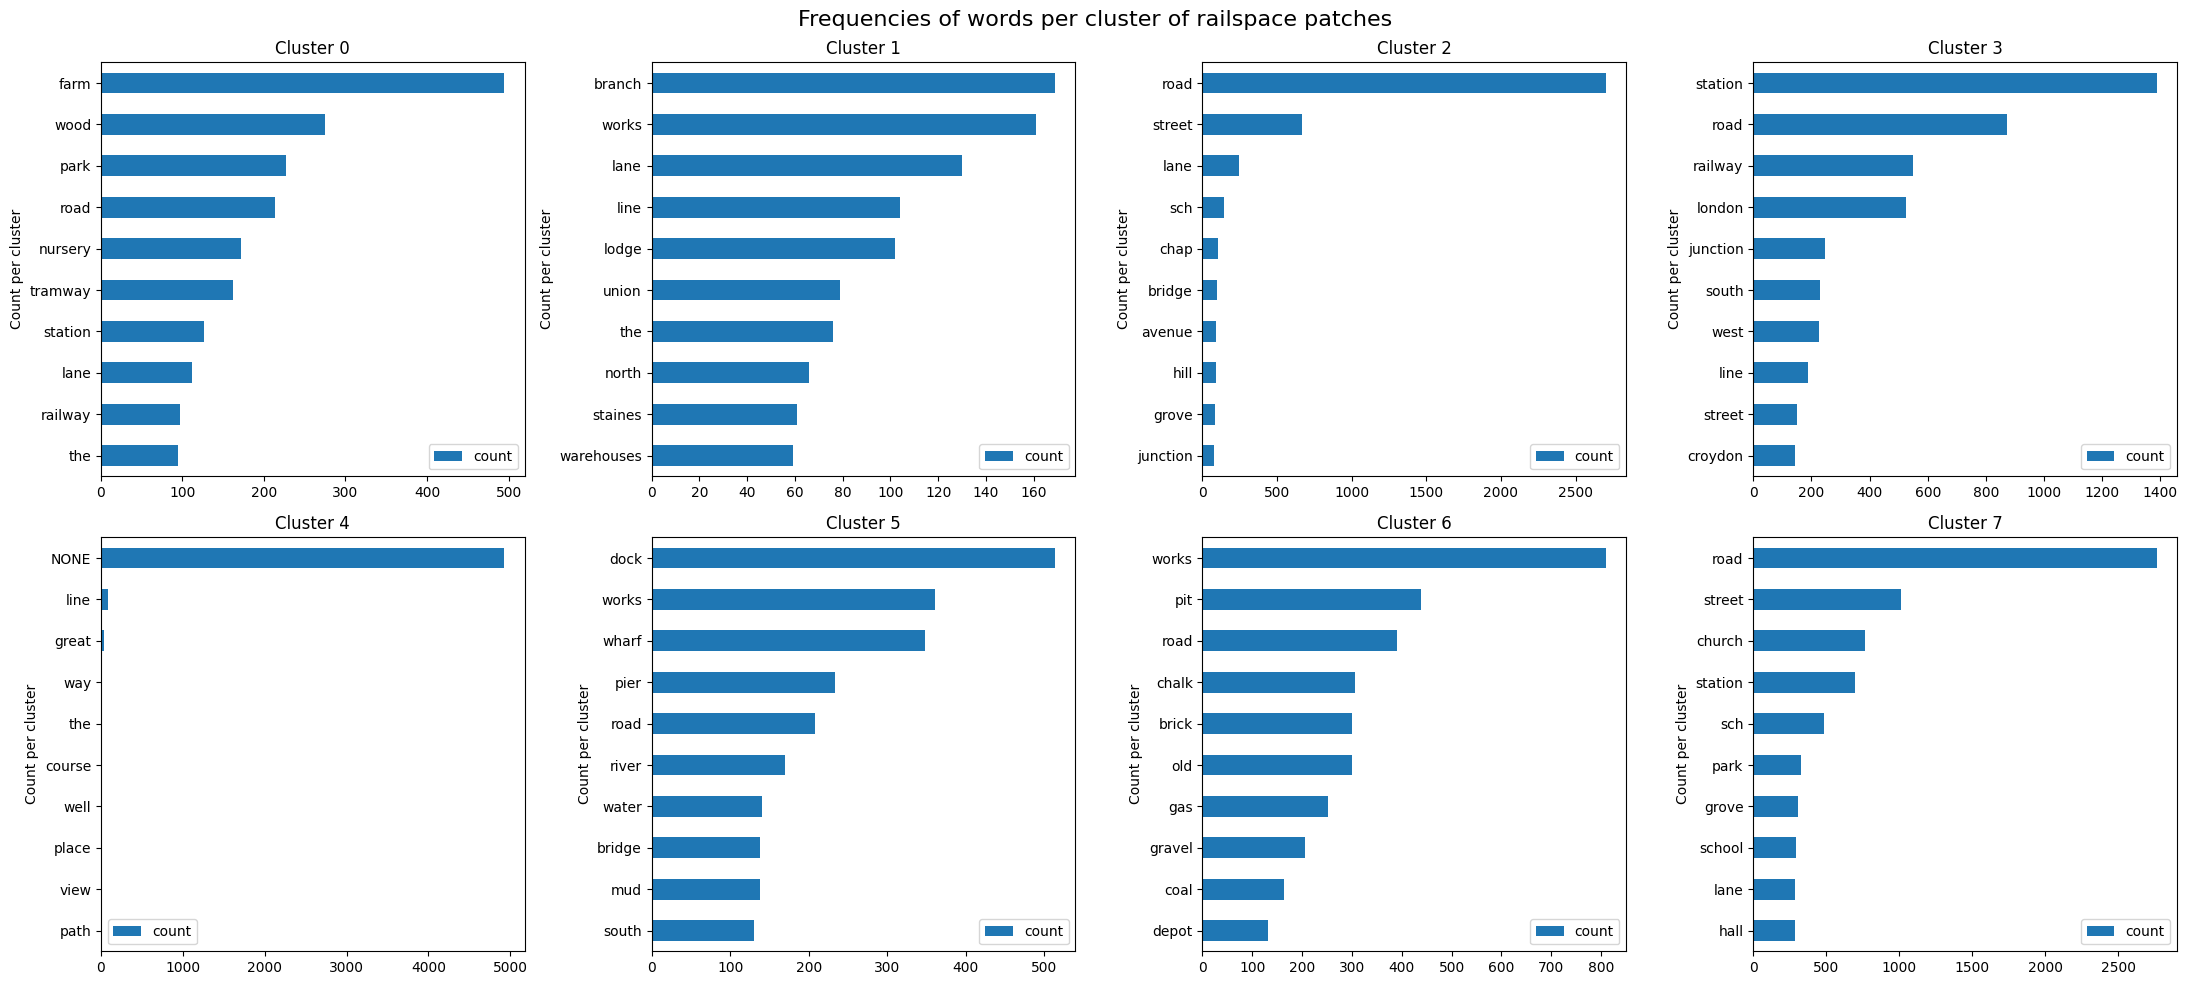

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

cluster_dataframes = {}

# plot the top 10 words per cluster
for cluster in cluster_labels_context.index:
	i, j = divmod(cluster, 4)

	counts = Counter(cluster_labels_context.iloc[cluster]["words"]) # count the words
	df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"]).reset_index(names=["word"])
	df["count_normalised"] = df["count"] / df["count"].sum() # normalise the counts by the total number of words in the cluster
	df.sort_values("count_normalised", inplace=True)
	df[-10:].plot(kind='barh', x='word', y='count', title=f'Cluster {cluster}', legend=True, ax=ax[i, j], ylabel="Count per cluster") # plot the top 10 words
	cluster_dataframes[cluster] = df

fig.suptitle("Frequencies of words per cluster of railspace patches", fontsize=16)
fig.tight_layout()
fig.savefig("word_counts_context.jpg", dpi=400, format="jpg")
fig.show()

In [56]:
all_words = [word for words in cluster_labels_context["words"].tolist() for word in words]
all_words_count = Counter(all_words)

/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_7185/680146119.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


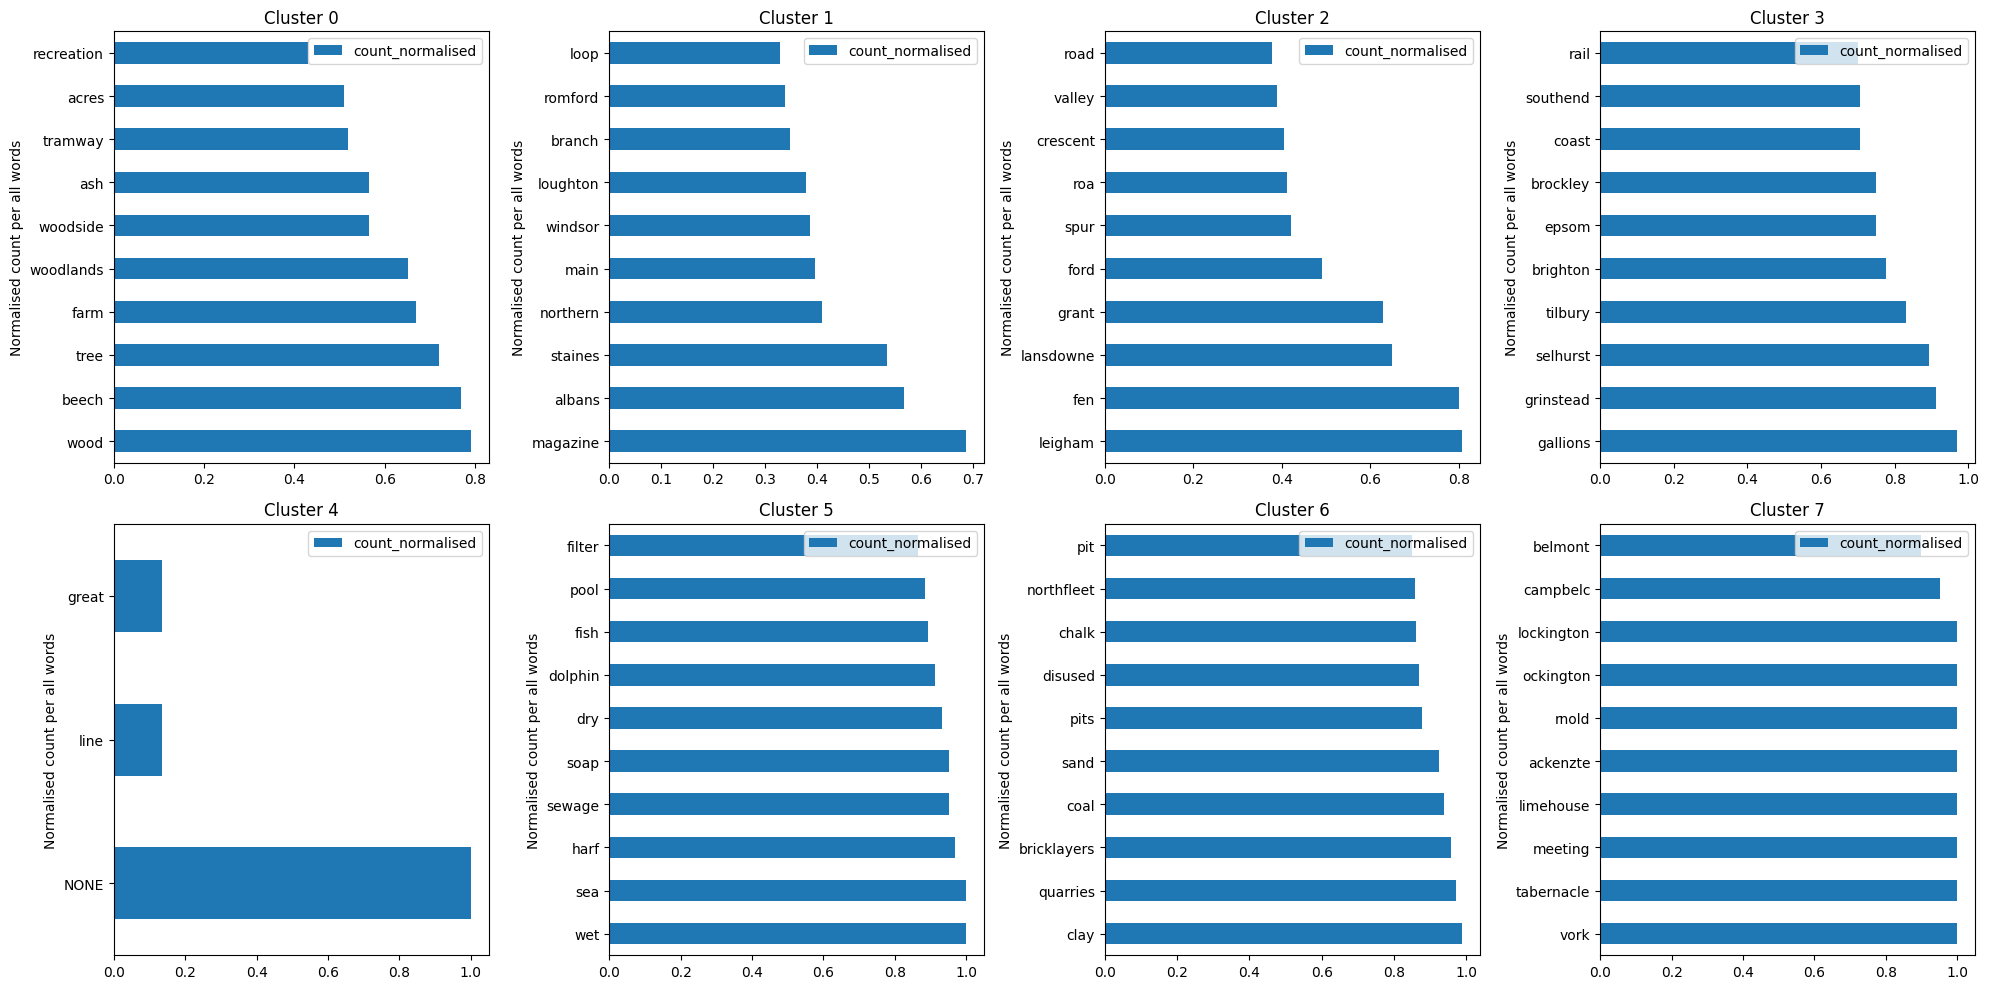

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

cluster_dataframes = {}

# plot the top 10 words per cluster, normalised by the total number of times that words appears in the dataset
for cluster in cluster_labels_context.index:
	i, j = divmod(cluster, 4)
	
	counts = Counter(cluster_labels_context.iloc[cluster]["words"])
	df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"]).reset_index(names=["word"])
	df_red = df[df["count"]>=20].copy(deep=True)
	df_red["count_normalised"] = df_red.apply(lambda row: row["count"] / all_words_count.get(row["word"]), axis=1)
	df_red.sort_values("count_normalised", ascending=False, inplace=True)
	df_red[:10].plot(kind='barh', x='word', y='count_normalised', title=f'Cluster {cluster}', legend=True, ax=ax[i, j], ylabel="Normalised count per all words")
	cluster_dataframes[cluster] = df_red

fig.tight_layout()
fig.show()

## 10b Clustering with just patch text

SKIP THIS CELL IF ALREADY RUN

In [58]:
# 10.1 Create 'sentences' of railspace labels in patches

# important this cell takes a while to run
# you can simply ignore and load the json file I've shared with you
tqdm.pandas()
near_text = [] # here we store labels close to the target category, i.e. railspace

for i,row in tqdm(railspace_patches.iterrows(), total=railspace_patches.shape[0]):
	# get text intersecting the patch
	# get the set of text labels
	text_in_patch = list(set(recognised_text_filtered[recognised_text_filtered.intersects(row.geometry)].text_cleaned.tolist()))
	# sort
	text_in_patch = sorted(text_in_patch)
	# add the labels as a list sorted alphabetically
	near_text.append(text_in_patch)


with open('near_text.json', 'w') as out_txt:
	json.dump(near_text, out_txt)

100%|██████████| 29395/29395 [03:38<00:00, 134.73it/s]


In [59]:
# load the labels from json
with open('near_text.json', 'r') as in_txt:
    near_text = json.load(in_txt)

In [60]:
railspace_patches["near_text"] = near_text

In [61]:
# 10.2 filter the list to remove short and non-alphabetic labels

# this is not ideal as it remove abbreviations and other useful information
# especially in the more denser urban areas, however we use it as a simple experiment
near_text_filtered = [' '.join([w for w in a if (len(w) > 2) and w.isalpha()]) for a in near_text]

In [62]:
# get the average number of words on a patch

np.mean([len(i) for i in near_text_filtered])

2.0291205987412826

In [63]:
# 10.3 load the embedding model

model = SentenceTransformer('distilbert-base-nli-mean-tokens') # Livingwithmachines/bert_1760_1900 | distilbert-base-nli-mean-tokens
# encode the railspace "sentences", i.e. the list of alphabetically sorted labels

# Note to self: avoid 'sentence'. say set of (alphabetically sorted) spotted text on patch. 
# now, for each set of patchText, we examine how similar they are to each other and organise them into a (pre-determined) number of 'clusters' 
# e.g. a cluster is a group of sets of patchText that are most like each other

railspace_sentence_embeddings = model.encode(near_text_filtered)

In [64]:
railspace_sentence_embeddings.shape, railspace_patches.shape

((29395, 768), (29395, 33))

In [65]:
# 10.4 fit the kmeans model to the railspace embeddings

# we choose a method of clustering as one approach among many to organise the data, to see patterns in the data
# this is connecting what we know about text and what we know about visual features on maps for the first time
# we can use the silhouette score to evaluate the quality of the clustering - best is 1, worst is -1

from sklearn.metrics import silhouette_score

cluster_data = {}

for n in [8]:
	cluster_data[n] = {}
	# fit the kmeans model
	kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", max_iter=1000).fit(railspace_sentence_embeddings)
	cluster_data[n]["kmeans"] = kmeans
	# get the silhouette score
	silhouette = silhouette_score(railspace_sentence_embeddings, kmeans.labels_, random_state=0)
	cluster_data[n]["silhouette"] = silhouette


In [66]:
# sort the clusters by silhouette score, best first
# best is 1, worst is -1

sorted_kmeans = pd.DataFrame(cluster_data).T.sort_values("silhouette", ascending=False)
sorted_kmeans.head()

,kmeans,silhouette
8,"KMeans(max_iter=1000, random_state=0)",0.744606


In [67]:
# choose the number of clusters with best silhouette score
best_kmeans = sorted_kmeans.iloc[0]["kmeans"]

In [68]:
# add labels to the railspace_patches dataframe

railspace_patches['cluster'] = best_kmeans.labels_
railspace_patches['near_text_filtered'] = near_text_filtered

In [ ]:
# 10.5 plot the different clusters on the map

railspace_patches.explore(column='cluster', tiles=tiles, categorical=True, cmap="viridis", popup=['cluster', 'near_text_filtered'])

10.6 Understanding Clusters

The cells below contain different ways of looking at the clusters

In [70]:
# get labels for each cluster in railspace_patches
cluster_labels = railspace_patches.groupby('cluster')['near_text_filtered'].apply(list).reset_index()
cluster_labels.head()

,cluster,near_text_filtered
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
1,1,"[beadon hammersmith, great rednall ter, redgra..."
2,2,"[dryburgh, crookham dancer mimosa, ham, sandge..."
3,3,"[road, road, road, road, road, road, car depot..."
4,4,"[nursery, gardens, gardens, green, gardens, ga..."


In [71]:
# count labels per cluster
cluster_labels['count'] = cluster_labels['near_text_filtered'].apply(lambda x: len(x))

In [72]:
# count unique labels per cluster
cluster_labels['unique_count'] = cluster_labels['near_text_filtered'].apply(lambda x: len(set(x)))

In [73]:
cluster_labels["count/unique_count"] = cluster_labels["count"]/cluster_labels["unique_count"]
cluster_labels["unique_count/count"] = cluster_labels["unique_count"]/cluster_labels["count"]
cluster_labels.head()

,cluster,near_text_filtered,count,unique_count,count/unique_count,unique_count/count
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21714,12,1809.500000,0.000553
1,1,"[beadon hammersmith, great rednall ter, redgra...",1655,885,1.870056,0.534743
2,2,"[dryburgh, crookham dancer mimosa, ham, sandge...",680,285,2.385965,0.419118
3,3,"[road, road, road, road, road, road, car depot...",738,94,7.851064,0.127371
4,4,"[nursery, gardens, gardens, green, gardens, ga...",542,240,2.258333,0.442804


In [74]:
# split the labels into words, using "NONE" to represent empty strings
cluster_labels["near_text_filtered_NONE"] = cluster_labels["near_text_filtered"].apply(lambda x: [word if len(word) else "NONE" for word in x])
cluster_labels["words"] = cluster_labels["near_text_filtered_NONE"].apply(lambda x: " ".join(x).split())
cluster_labels

,cluster,near_text_filtered,count,unique_count,count/unique_count,unique_count/count,near_text_filtered_NONE,words
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21714,12,1809.500000,0.000553,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...","[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
1,1,"[beadon hammersmith, great rednall ter, redgra...",1655,885,1.870056,0.534743,"[beadon hammersmith, great rednall ter, redgra...","[beadon, hammersmith, great, rednall, ter, red..."
2,2,"[dryburgh, crookham dancer mimosa, ham, sandge...",680,285,2.385965,0.419118,"[dryburgh, crookham dancer mimosa, ham, sandge...","[dryburgh, crookham, dancer, mimosa, ham, sand..."
3,3,"[road, road, road, road, road, road, car depot...",738,94,7.851064,0.127371,"[road, road, road, road, road, road, car depot...","[road, road, road, road, road, road, car, depo..."
4,4,"[nursery, gardens, gardens, green, gardens, ga...",542,240,2.258333,0.442804,"[nursery, gardens, gardens, green, gardens, ga...","[nursery, gardens, gardens, green, gardens, ga..."
5,5,"[pier, floating, laundry, goods, hospital, che...",888,255,3.482353,0.287162,"[pier, floating, laundry, goods, hospital, che...","[pier, floating, laundry, goods, hospital, che..."
6,6,"[electric station, tramway, railway sil street...",589,145,4.062069,0.246180,"[electric station, tramway, railway sil street...","[electric, station, tramway, railway, sil, str..."
7,7,"[sta, broadwway, talgarth, putney, ewald, hilm...",2589,1012,2.558300,0.390885,"[sta, broadwway, talgarth, putney, ewald, hilm...","[sta, broadwway, talgarth, putney, ewald, hilm..."


/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_7185/4093109037.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


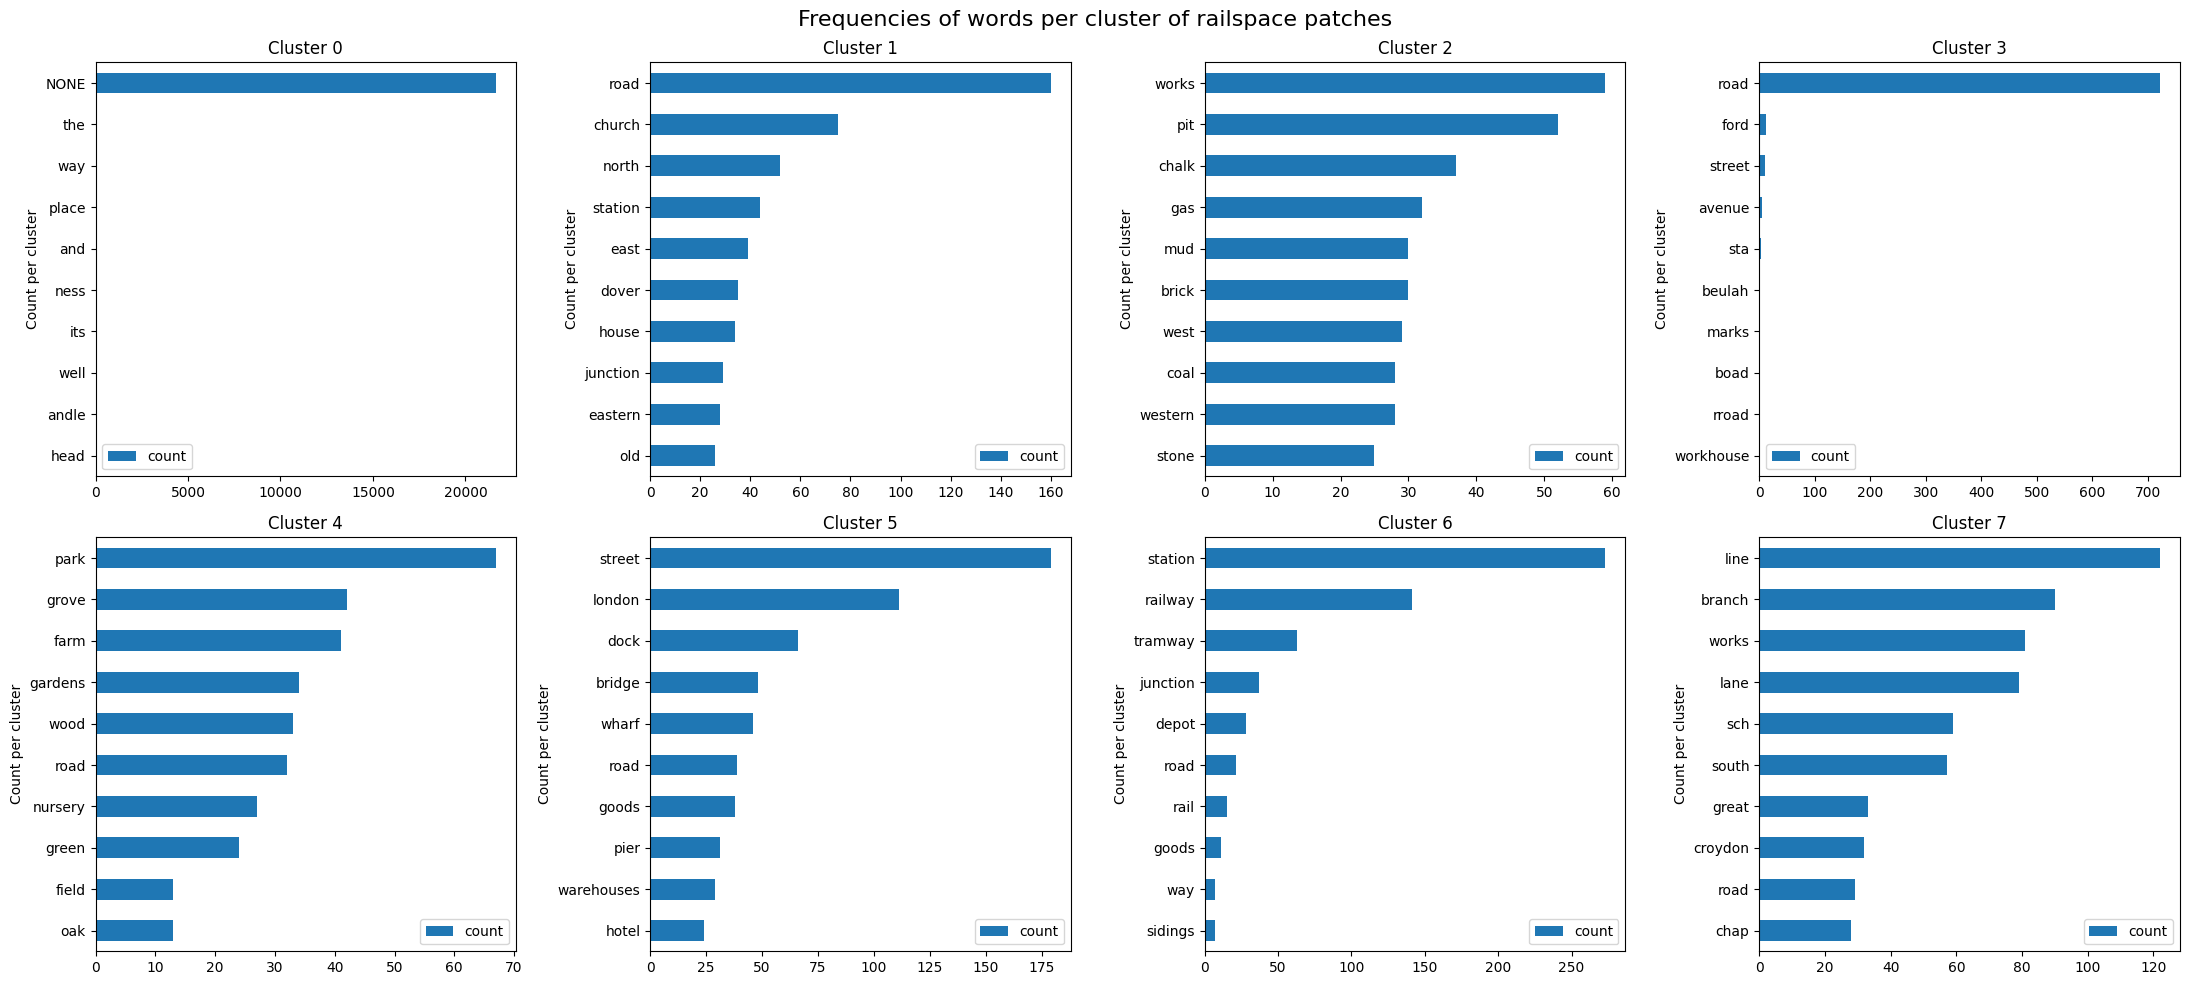

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))

cluster_dataframes = {}

# plot the top 10 words per cluster
for cluster in cluster_labels.index:
	i, j = divmod(cluster, 4)

	counts = Counter(cluster_labels.iloc[cluster]["words"]) # count the words
	df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"]).reset_index(names=["word"])
	df["count_normalised"] = df["count"] / df["count"].sum() # normalise the counts by the total number of words in the cluster
	df.sort_values("count_normalised", inplace=True)
	df[-10:].plot(kind='barh', x='word', y='count', title=f'Cluster {cluster}', legend=True, ax=ax[i, j], ylabel="Count per cluster")
	cluster_dataframes[cluster] = df

fig.suptitle("Frequencies of words per cluster of railspace patches", fontsize=16)
fig.tight_layout()
# fig.savefig("word_counts.jpg", dpi=400, format="jpg")
fig.show()

In [76]:
patches_per_cluster = railspace_patches['cluster'].value_counts()
print(patches_per_cluster)

cluster
0    21714
7     2589
1     1655
5      888
3      738
2      680
6      589
4      542
Name: count, dtype: int64


# Fin.